When trying to make sense of data, there are many representations to choose from, including data tables, textual summaries and so on. We'll mostly focus on plotting data to get an intuitive visual representation, using a simple but powerful plotting API.

If you have tried to visualize a `pandas.DataFrame` before, then you have likely encountered the [Pandas .plot() API](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html). These plotting commands use [Matplotlib](http://matplotlib.org) to render static PNGs or SVGs in a Jupyter notebook using the `inline` backend, or interactive figures via `%matplotlib widget`, with a command that can be as simple as `df.plot()` for a DataFrame with one or two columns. 

The Pandas .plot() API has emerged as a de-facto standard for high-level plotting APIs in Python, and is now supported by many different libraries that use various underlying plotting engines to provide additional power and flexibility. Learning this API allows you to access capabilities provided by a wide variety of underlying tools, with relatively little additional effort. The libraries currently supporting this API include:

- [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) -- Matplotlib-based API included with Pandas. Static or interactive output in Jupyter notebooks.
- [xarray](https://xarray.pydata.org/en/stable/plotting.html) -- Matplotlib-based API included with xarray, based on pandas .plot API. Static or interactive output in Jupyter notebooks.
- [hvPlot](https://hvplot.pyviz.org) -- Bokeh/Matplotlib/Plotly-based HoloViews plots for Pandas, GeoPandas, xarray, Dask, Intake, and Streamz data.
- [Pandas Bokeh](https://github.com/PatrikHlobil/Pandas-Bokeh) -- Bokeh-based interactive plots, for Pandas, GeoPandas, and PySpark data.
- [Cufflinks](https://github.com/santosjorge/cufflinks) -- Plotly-based interactive plots for Pandas data.
- [Plotly Express](https://plotly.com/python/pandas-backend) -- Plotly-Express-based interactive plots for Pandas data; only partial support for the .plot API keywords.
- [PdVega](https://altair-viz.github.io/pdvega) -- Vega-lite-based, JSON-encoded interactive plots for Pandas data.

In this notebook we'll explore what is possible with the default `.plot` API and demonstrate the additional capabilities provided by `.hvplot`, which include seamless interactivity in notebooks and deployed dashboards, server-side rendering of even the largest datasets, automatic small multiples and widget selectors for exploring complex data, and easy composition and linking of plots after they are generated. 

To show these features, we'll use a tabular dataset of earthquakes and other seismological events queried 
from the [USGS Earthquake Catalog](https://earthquake.usgs.gov/earthquakes/search) using its 
[API](https://github.com/pyviz/holoviz/wiki/Creating-the-USGS-Earthquake-dataset). Of course, this particular dataset is just an example; the same approach can be used with just about any tabular dataset, and similar approaches can be used with [gridded (multidimensional array) datasets](https://hvplot.holoviz.org/user_guide/Gridded_Data.html).

## Read in the data

Here we will focus on Pandas, but a similar approach will work for any supported DataFrame type, including Dask for distributed computing or RAPIDS cuDF for GPU computing. This dataset is relatively large (2.1 million rows), but should still fit into memory on any recent machine, and thus won't need special out-of-core or distributed approaches like Dask provides.

In [13]:
import pathlib
import pandas as pd
from vega_datasets import data
df = data.airports()
# df = data.weather()
df


,iata,name,city,state,country,latitude,longitude
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...
3371,ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
3372,ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
3373,ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916
3374,ZUN,Black Rock,Zuni,NM,USA,35.083227,-108.791777


In [ ]:
%%time
df = pd.read_parquet(pathlib.Path('../data/earthquakes-projected.parq'))
df = df.set_index(df.time)

In [26]:
print(df.shape)
df.head()

(3376, 7)


,iata,name,city,state,country,latitude,longitude
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


To compare HoloViz approaches with other approaches, we'll also construct a subsample of the dataset that's tractable with any plotting or analysis tool, but has only 1% of the data:

In [27]:
small_df = df.sample(frac=.01)
print(small_df.shape)
small_df.head()

(34, 7)


,iata,name,city,state,country,latitude,longitude
2969,SLC,Salt Lake City Intl,Salt Lake City,UT,USA,40.788388,-111.977773
1383,EKQ,Wayne County,Monticello,KY,USA,36.855278,-84.856139
848,AOH,Allen County,Lima,OH,USA,40.706944,-84.026667
1933,JST,Johnstown-Cambria Cty,Johnstown,PA,USA,40.316111,-78.833944
2948,SHH,Shishmaref,Shishmaref,AK,USA,66.249569,-166.089559


We'll switch back and forth between `small_df` and `df` depending on whether the technique we are showing works well only for small datasets, or whether it can be used for any dataset.

## Using Pandas `.plot()`

The first thing that we'd like to do with this data is visualize the locations of every earthquake. So we would like to make a scatter or points plot where _x_ is longitude and _y_ is latitude. 

We can do that for the smaller dataframe using the `pandas.plot` API and Matplotlib:

In [3]:
%matplotlib inline

In [ ]:
%matplotlib widget
# !pip install ipympl

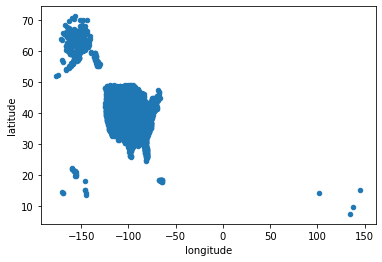

In [43]:
# small_df.plot.scatter(x='longitude', y='latitude');
df.plot.scatter(x='longitude', y='latitude');

### Exercise: 
Try changing `inline` to `widget` and see what interactivity is available from Matplotlib. In some cases you may have to reload the page and restart this notebook to get it to display properly.

## Using `.hvplot`

As you can see above, the Pandas API gives you a usable plot very easily, where you can start to see the structure of the edges of the tectonic plates, which in many cases correspond with the visual edges of continents (e.g. the westward side of Africa, in the center). You can make a very similar plot with the same arguments using hvplot, after importing `hvplot.pandas` to install hvPlot support into Pandas:

In [16]:
import hvplot.pandas # noqa: adds hvplot method to pandas objects

ModuleNotFoundError: No module named 'hvplot'

In [ ]:
small_df.hvplot.scatter(x='longitude', y='latitude')

Here unlike in the Pandas `.plot()` the displayed plot is a **Bokeh** plot that has a default hover action on the datapoints to show the location values, and you can always pan and zoom to focus on any particular region of the data of interest. Zoom and pan also work if you use the `widget` Matplotlib backend.

You might have noticed that many of the dots in the scatter that we've just created lie on top of one another. This is called ["overplotting"](https://datashader.org/user_guide/Plotting_Pitfalls.html) and can be avoided in a variety of ways, such as by making the dots slightly transparent, or binning the data. 

### Exercise

Try changing the alpha (try .1) on the plot above to see the effect of this approach
<details><summary><i><u>(Solution)</u><i></summary><br>
    
```python
small_df.hvplot.scatter(x='longitude', y='latitude', alpha=0.1)
```

</details>

Try creating a `hexbin` plot.
<details><summary><i><u>(Solution)</u><i></summary><br>

```python
small_df.hvplot.hexbin(x='longitude', y='latitude')
```
</details>

## Getting help with hvplot options

You may be wondering how you could have found out about the `alpha` keyword option in the first exercise or how you can learn about all the options that are available with `hvplot`. For this purpose, you can use tab-completion in the Jupyter notebook or the `hvplot.help` function which are documented in the [user guide](https://hvplot.holoviz.org/user_guide/Customization.html).

For tab completion, you can press tab after the opening parenthesis in a `obj.hvplot.<kind>(` call. For instance, you can try pressing tab after the partial expression `small_df.hvplot.scatter(<TAB>`.

Alternatively, you can call `hvplot.help(<kind>)` to see a documentation pane pop up in the notebook. Try uncommenting the following line and executing it:

In [ ]:
# hvplot.help('scatter')

You will see there are a lot of options!  You can control which section of the documentation you view with the `generic`, `docstring` and `style` boolean switches also documented in the  [user guide](https://hvplot.holoviz.org/user_guide/Customization.html). If you run the following cell, you will see that `alpha` is listed in the 'Style options'.

In [ ]:
# hvplot.help('scatter', style=True, generic=False)

These style options refer to options that are part of the Bokeh API. This means that the `alpha` keyword is passed directly to Bokeh just like all the other style options. As these are Bokeh-level options, you can find out more by using the search functionality in the [Bokeh docs](https://docs.bokeh.org/en/latest/).

## Datashader

As you saw above, there are often arbitrary choices that you are faced with making even before you understand the properties of the dataset, such as selecting an alpha value or a bin size for aggregations. Making such assumptions can accidentally bias you towards certain aspects of the data, and of course having to throw away 99% of the data can cover up patterns you might have otherwise seen. For an initial exploration of a new dataset, it's much safer if you can just ***see*** the data, before you impose any assumptions about its form or structure, and without having to subsample it.

To avoid some of the problems of traditional scatter/point plots we can use hvPlot's [Datashader](datashader.org) support. Datashader aggregates data into each pixel without any arbitrary parameter settings, making your data visible immediately, before you know what to expect of it. In `hvplot` we can activate this capability by setting `rasterize=True` to invoke Datashader before rendering and `cnorm='eq_hist'` (["histogram equalization"](https://datashader.org/user_guide/Plotting_Pitfalls.html)) to specify that the colormapping should adapt to whatever distribution the data has:

In [ ]:
small_df.hvplot.scatter(x='longitude', y='latitude', rasterize=True, cnorm='eq_hist')

We can already see a lot more detail, but remember that we are still only plotting 1% of the data (21k earthquakes). With Datashader, we can quickly and easily plot all of the full, original dataset of 2.1 million earthquakes:

In [ ]:
df.hvplot.scatter(x='longitude', y='latitude', rasterize=True, cnorm='eq_hist', dynspread=True)

Here you can see all of the rich detail in the full set of millions of earthquake event locations. If you have a live Python process running, you can zoom in and see additional detail at each zoom level, without tuning any parameters or making any assumptions about the form or structure of the data. If you prefer, you can specify colormapping `cnorm='log'` or the default `cnorm='linear'`, which are easier to interpret, but starting with `cnorm='eq_hist'` is usually a good idea so that you can see the shape of the data before committing to an easier-to-interpret but potentially data-obscuring colormap. You can learn more about Datashader at [datashader.org](https://datashader.org) or the [Datashader page on holoviews.org](https://holoviews.org/user_guide/Large_Data.html). For now, the most important thing to know about it is that Datashader lets us work with arbitrarily large datasets in a web browser conveniently.

Here we used  `.hvplot()` on a Pandas dataframe, but (unlike other `.plot` libraries), the same commands will work on many other libraries after the appropriate import (`import hvplot.xarray`, `import hvplot.dask`, etc.): 
 - Pandas : DataFrame, Series (columnar/tabular data)
 - xarray : Dataset, DataArray (labelled multidimensional arrays)
 - Dask : DataFrame, Series (distributed/out of core arrays and columnar data)
 - Streamz : DataFrame(s), Series(s) (streaming columnar data)
 - Intake : DataSource (data catalogues)
 - GeoPandas : GeoDataFrame (geometry data)
 - NetworkX : Graph (network graphs)

#### Exercise


Select a subset of the data, e.g. only magitudes >5 and plot them with a different colormap (valid `cmap` values include 'viridis_r', 'Reds' and 'magma_r'):
<details><summary><i><u>(Solution)</u><i></summary><br>

```python
df[df.mag>5].hvplot.scatter(x='longitude', y='latitude', rasterize=True, cnorm='eq_hist', cmap='Reds')
```
    
</details>

## Statistical Plots

Let's dive into some of the other capabilities of `.plot()` and `.hvplot()`, starting with the frequency of different magnitude earthquakes.

| Magnitude     | Earthquake Effect | Estimated Number Each Year |
|---------------|-------------------|----------------------------|
| 2.5 or less   | Usually not felt, but can be recorded by seismograph. |900,000|
| 2.5 to 5.4    | Often felt, but only causes minor damage. |30,000 |
| 5.5 to 6.0    | Slight damage to buildings and other structures. |500 |
| 6.1 to 6.9    | May cause a lot of damage in very populated areas. | 100 |
| 7.0 to 7.9    | Major earthquake. Serious damage. | 20 |
| 8.0 or greater| Great earthquake. Can totally destroy communities near the epicenter. | One every 5 to 10 years |

As a first pass, we'll use a histogram first with `.plot.hist`, then with `.hvplot.hist`. Before plotting we can clean the data by setting any magnitudes that are less than 0 to NaN.

In [ ]:
cleaned_df = df.copy()
cleaned_df['mag'] = df.mag.where(df.mag > 0)

In [ ]:
cleaned_df.plot.hist(y='mag', bins=50);

In [ ]:
df.hvplot.hist(y='mag', bin_range=(0, 10), bins=50)

#### Exercise

Create a kernel density estimate (kde) plot of magnitude for `cleaned_df`:
<details><summary><i><u>(Solution)</u><i></summary><br>

```python
cleaned_df.hvplot.kde(y='mag')
```

</details>

## Categorical variables

Next we'll categorize the earthquakes based on depth. You can read about all the different variables available in this dataset [here](https://earthquake.usgs.gov/data/comcat/data-eventterms.php). According to the [USGS page on earthquake depths](https://www.usgs.gov/natural-hazards/earthquake-hazards/science/determining-depth-earthquake?qt-science_center_objects=0#qt-science_center_objects), typical depth categories are:

| Depth class   | Depth       | 
|---------------|-------------|
| shallow       | 0   -  70 km| 
| intermediate  | 70  - 300 km| 
| deep          | 300 - 700 km| 

First we'll use `pd.cut` to split the small_dataset into depth categories.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
depth_bins = [-np.inf, 70, 300, np.inf]
depth_names = ['Shallow', 'Intermediate', 'Deep']
depth_class_column = pd.cut(cleaned_df['depth'], depth_bins, labels=depth_names)

In [ ]:
cleaned_df.insert(1, 'depth_class', depth_class_column)

We can now use this new categorical variable to group our data. First we will overlay all our groups on the same plot using the `by` option:

In [ ]:
cleaned_df.hvplot.hist(y='mag', by='depth_class', alpha=0.6)

**NOTE:** Click on the legend to turn off certain categories and see what is behind them.

#### Exercise

Add `subplots=True` and `width=300` to see the different classes side-by-side instead of overlaid. The axes will be linked, so try zooming.

## Grouping
What if you want a single plot, but want to see each class separately? You can use the `groupby` option to get a widget for toggling between classes, here in a bivariate plot (using a subset of the data as bivariate plots can be expensive to compute):

In [ ]:
cleaned_small_df = cleaned_df.sample(frac=.01)
cleaned_small_df.hvplot.bivariate(x='mag', y='depth', groupby='depth_class')

In addition to classifying by depth, we can classify by magnitude.

| Magnitude Class| Magnitude | 
|----------------|-----------|
| Great          | 8 or more | 
| Major          | 7 - 7.9   | 
| Strong         | 6 - 6.9   |
| Moderate       | 5 - 5.9   |
| Light          | 4 - 4.9   |
| Minor          | 3 -3.9    |

In [ ]:
classified_df = df[df.mag >= 3].copy()

depth_class = pd.cut(classified_df.depth, depth_bins, labels=depth_names)

classified_df['depth_class'] = depth_class

mag_bins = [2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 10]
mag_names = ['Minor', 'Light', 'Moderate', 'Strong', 'Major', 'Great']
mag_class = pd.cut(classified_df.mag, mag_bins, labels=mag_names)
classified_df['mag_class'] = mag_class

categorical_df = classified_df.groupby(['mag_class', 'depth_class']).count()

Now that we have binned the data into two categories, we can use a logarithmic heatmap to visually represent this data as the count of detected earthquake events in each combination of depth and mag class:

In [ ]:
categorical_df.hvplot.heatmap(x='mag_class', y='depth_class', C='id',
                              logz=True, clim=(1, np.nan))

Here it is clear that the most commonly detected events are light, and typically shallow.

## Output Matplotlib or Plotly plots

While the default plotting backend/extension of hvPlot is Bokeh, it also supports rendering plots with either [Plotly](https://plotly.com/python/) or [Matplotlib](https://matplotlib.org/). Like Bokeh, Plotly is an interactive library that provides similar data-exploring actions (pan, hover, zoom, etc.). You can decide to use Plotly instead of Bokeh if you prefer its look and feel, need interactive 3D plots, or if your organization's policy is to use that plotting library. Matplotlib is supported for static plots only (e.g. PNG or SVG), which is useful for saving and sharing images and embedding them in documents for publication.

To load a plotting backend you can use the `hvplot.extension` function. The first backend you declare in the call to the function will be set as the default one.

In [ ]:
hvplot.extension('plotly', 'matplotlib')

small_df.hvplot.scatter(x='longitude', y='latitude')

Once a backend is loaded with `hvplot.extension` you can use the `hvplot.output` function to switch from one backend to another.

In [ ]:
hvplot.output(backend='matplotlib')

plot = small_df.hvplot.scatter(x='longitude', y='latitude')
plot

## Save and further customize plots

You can easily save a plot with the `hvplot.save` function in one of the output formats supported by the backend. This is particularly useful when you are using Matplotlib as your plotting backend, with which you can create static plots suited for publication.

In [ ]:
fp_png, fp_svg = '../output/plot.png', '../output/plot.svg'
hvplot.save(plot, fp_png)
hvplot.save(plot, fp_svg)

In [ ]:
from IPython.display import display, Image, SVG

display(Image(fp_png))
display(SVG(fp_svg))

While hvPlot allows you to customize your plots quite extensively there are always situations where you want to customize them a little more than what can be done directly with hvPlot. In those cases you can use the `hvplot.render` function to get a handle on the underlying figure object. Below we're using Matplotlib's `xkcd` context manager to turn on *xkcd* sketch-style drawing mode while rendering the figure.

In [ ]:
import matplotlib.pyplot as plt

with plt.xkcd():
    mpl_fig = hvplot.render(plot)

print(mpl_fig)
mpl_fig

`mpl_fig` is a Matplotlib `Figure` object that we could further customize using [Matplotlib's API](https://matplotlib.org/stable/api).

## Exploring further

As you can see, hvPlot makes it simple to explore your data interactively, with commands based on the widely used Pandas `.plot()` API but now supporting many more features and different types of data. The visualizations above just touch the surface of what is available from hvPlot, and you can explore the [hvPlot website](https://hvplot.pyviz.org) to see much more, or just explore it yourself using tab completion (`df.hvplot.`_[TAB]_). The following section will focus on how to put these plots together once you have them, linking them to understand and show their structure.